# DAT405/DIT407 Introduction to Data Science and AI 
## 2022-2023, Reading Period 4
## Assignment 4: Spam classification using Naïve Bayes 
The exercise takes place in this notebook environment.
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.

**What to submit:** 
Convert the notebook to a pdf-file and submit it. Make sure all cells are executed so all your code and its results are included. Double check the pdf displays correctly before you submit it.

In [2]:
#Download and extract data
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
# !tar -xjf 20021010_easy_ham.tar.bz2
# !tar -xjf 20021010_hard_ham.tar.bz2
# !tar -xjf 20021010_spam.tar.bz2

--2023-04-19 13:46:40--  https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 2a04:4e42::644, 151.101.2.132
Connecting to spamassassin.apache.org (spamassassin.apache.org)|2a04:4e42::644|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1677144 (1,6M) [application/x-bzip2]
Saving to: ‘20021010_easy_ham.tar.bz2’

20021010_easy_ham.t 100%[===================>]   1,60M  --.-KB/s    in 0,1s    

2023-04-19 13:46:41 (14,3 MB/s) - ‘20021010_easy_ham.tar.bz2’ saved [1677144/1677144]

--2023-04-19 13:46:41--  https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 2a04:4e42::644, 151.101.2.132
Connecting to spamassassin.apache.org (spamassassin.apache.org)|2a04:4e42::644|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1021126 (997K) [application/x-bzip2]
Saving to: ‘20021010_hard_

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [3]:
!ls -lah

total 7672
drwxr-xr-x    11 chenbingcheng  staff   352B Apr 19 13:46 .
drwxr-xr-x    10 chenbingcheng  staff   320B Apr 19 10:03 ..
-rw-r--r--@    1 chenbingcheng  staff   6.0K Apr 19 13:46 .DS_Store
-rw-r--r--     1 chenbingcheng  staff   1.6M Jun 29  2004 20021010_easy_ham.tar.bz2
-rw-r--r--     1 chenbingcheng  staff   997K Dec 16  2004 20021010_hard_ham.tar.bz2
-rw-r--r--     1 chenbingcheng  staff   1.1M Jun 29  2004 20021010_spam.tar.bz2
-rw-r--r--@    1 chenbingcheng  staff    14K Apr 19 13:46 IDSAI_Assignment4_SP4_22-23.ipynb
drwx--x--x  2553 chenbingcheng  staff    80K Oct 10  2002 easy_ham
drwx--x--x   252 chenbingcheng  staff   7.9K Dec 16  2004 hard_ham
drwxr-xr-x   503 chenbingcheng  staff    16K Oct 10  2002 spam
-rw-r--r--     1 chenbingcheng  staff    65B Apr 19 13:41 test.py


### 1. Preprocessing: 

##### 1.1 Look at a few emails from easy_ham, hard_ham and spam. Do you think you would be able to classify the emails just by inspection? How do you think a succesful model can learn the difference between the different classes of emails?


In [24]:
import os
import random

# Set directory path for easy_ham and spam
easy_ham_dir = 'easy_ham'
hard_ham_dir = 'hard_ham'
spam_dir = 'spam'

# Get the list of file names in each fold
easy_ham_files = [os.path.join(easy_ham_dir, file) for file in os.listdir(easy_ham_dir)]
hard_ham_files = [os.path.join(hard_ham_dir, file) for file in os.listdir(hard_ham_dir)]
spam_files = [os.path.join(spam_dir, file) for file in os.listdir(spam_dir)][1:]

# Choose 1 random file from each type
random_easy_ham = random.sample(easy_ham_files,1)
random_hard_ham = random.sample(hard_ham_files,1)
random_spam = random.sample(spam_files,1)

# Print the name of the chosen files
print(random_easy_ham)
print(random_hard_ham)
print(random_spam)

# List of files to be read
read_list = random_easy_ham + random_hard_ham +random_spam

# Loop through the list and read each file
for file_name in read_list:
    with open(file_name, 'r', encoding='utf-8', errors='ignore') as file:
        # print contents
        print('############################ No.{} email##############################'.format(read_list.index(file_name)+1))
        # print(file.read())

['easy_ham/0132.bcd23223120c0be6b991ae0349cd127c']
['hard_ham/0178.5b7f2a0e87c853e8c8e13d556c1320d2']
['spam/0197.6968d98720065059247cefe4e5bcd192']
############################ No.1 email##############################
############################ No.2 email##############################
############################ No.3 email##############################


##### 1.2 Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use only the easy_ham part as ham data for quesions 1 and 2.

Answer 1.1:

In [35]:
def read_files(file_list):
    # files = os.listdir(file_fold)
    messages = []
    for file in file_list:
        with open(file, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()
            messages.append((content, "ham" if "ham" in file else "spam"))
    return messages

easy_ham_message = read_files(easy_ham_files)
spam_messages = read_files(spam_files)

In [36]:
from sklearn.model_selection import train_test_split

# Split the ham and spam files into training and testing datasets
hamtrain, hamtest = train_test_split(easy_ham_message, test_size=0.2, random_state=42)
spamtrain, spamtest = train_test_split(spam_messages, test_size=0.2, random_state=42)

# Print the number of the traning/testing datasets
print("Number of hamtrain:", len(hamtrain))
print("Number of hamtest:", len(hamtest))
print("Number of spamtrain:", len(spamtrain))
print("Number of spamtest:", len(spamtest))

Number of hamtrain: 2040
Number of hamtest: 511
Number of spamtrain: 400
Number of spamtest: 100


### 2.1 Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. Use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform([message[0] for message in hamtrain+spamtrain])
y_train = [message[1] for message in hamtrain+spamtrain]

X_test = vectorizer.transform([message[0] for message in hamtest+spamtest])
y_test = [message[1] for message in hamtest+spamtest]

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'from': 35967, 'ilug': 44427, 'admin': 18645, 'linux': 49405, 'ie': 44003, 'fri': 35929, 'aug': 20946, '23': 7666, '11': 3849, '08': 2643, '03': 2290, '2002': 6291, 'return': 61820, 'path': 56661, 'delivered': 29454, 'to': 68421, 'zzzz': 76658, 'localhost': 49716, 'netnoteinc': 53600, 'com': 26696, 'received': 61011, '127': 4108, 'by': 24288, 'phobos': 57442, 'labs': 48540, 'postfix': 58245, 'with': 73386, 'esmtp': 33443, 'id': 43822, 'e461e44174': 31761, 'for': 35553, '06': 2506, '36': 9305, '0400': 2388, 'edt': 32350, 'imap': 44466, 'fetchmail': 34851, 'single': 64647, 'drop': 31119, '0100': 1768, 'ist': 45666, 'lugh': 50094, 'tuatha': 69110, 'org': 55585, 'root': 62418, '194': 5676, '125': 4086, '145': 4358, '45': 10734, 'dogma': 30637, 'slashnull': 64839, 'g7n7rjz14671': 36725, 'example': 33738, '27': 8070, '19': 5635, 'iaa13280': 43587, '50': 11546, 'authentication': 20992, 'warning': 72430, 'host': 42960, 'claimed': 26184, 'be': 22360, 'mail01': 50598, 'svc': 66686,

#### 2.1.1 Multinomial Naive Bayes

True Positive Rate: 0.85
False Negative Rate: 0.15


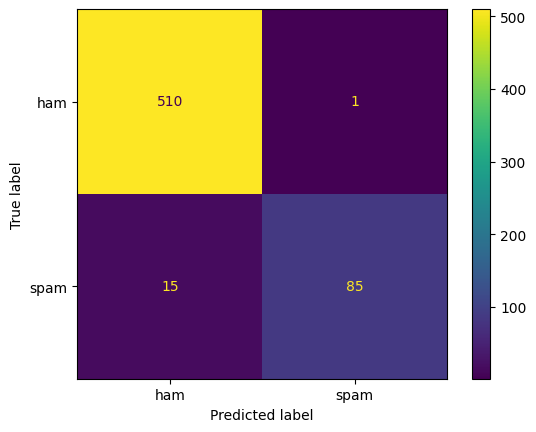

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

# reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets.
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive Rate:", tp / (tp + fn))
print("False Negative Rate:", fn / (tp + fn))

# plot the comfusionMatrix
cm = confusion_matrix(y_test, y_pred, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()

#### 2.1.2 Bernoulli Naive Bayes

In [3]:
from sklearn.naive_bayes import BernoulliNB

### 2.2 Answer the following questions:
##### a) What does the CountVectorizer do?
Answer 2.2.a
##### b) What is the difference between Multinomial Naive Bayes and Bernoulli Naive Bayes
Answer 2.2.b


### 3.1 Run the two models:
Run (don't retrain) the two models from Question 2 on spam versus hard-ham. Does the performance differ compared to question 2 when the model was run on spam versus easy-ham? If so, why?

In [ ]:
# Write your code here

Answer 3.1:

### 3.2 Retrain
Retrain new Multinomial and Bernolli Naive Bayes classifers on the combined (easy+hard) ham and spam. Now evaluate on spam versus hard-ham as in 3.1. Also evaluate on spam versus easy-ham. Compare the performance with question 2 and 3.1. What do you observe?

In [ ]:
# Write your code here

Answer 3.2:

### 3.3 Further improvements
Do you have any suggestions for how performance could be further improved? You don't have to implement them, just present your ideas.

Answer 3.3: